`import library`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

`connect GoogleDrive`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


`read data`

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/project/PORTODATA/credit_scoring/hmeq.csv')
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


* BAD : 1 = klien gagal bayar pinjaman; 0 = pinjaman dilunasi
* LOAN : Jumlah permintaan pinjaman
* MORTDUE : Jumlah yang harus dibayar pada hipotek yang ada
* VALUE : Nilai properti saat ini
* REASON : DebtCon = konsolidasi hutang; HomeImp = perbaikan rumah
* JOB : Enam kategori pekerjaan
* YOJ : Tahun bekerja saat ini
* DEROG : Jumlah laporan penghinaan utama
* DELINQ : Jumlah kredit macet
* CLAGE : Usia jalur perdagangan tertua dalam beberapa bulan 
* NINQ : Jumlah kredit terbaru yang ditanyakan
* CLNO : Jumlah perdagangan
* DEBTINC : Rasio utang terhadap pendapatan

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


`persentase missing value dalam setiap fitur`

In [ ]:
(data.isna().sum()*100/len(data)).sort_values(ascending=False)

DEBTINC    21.258389
DEROG      11.879195
DELINQ      9.731544
MORTDUE     8.691275
YOJ         8.640940
NINQ        8.557047
CLAGE       5.167785
JOB         4.681208
REASON      4.228188
CLNO        3.724832
VALUE       1.879195
BAD         0.000000
LOAN        0.000000
dtype: float64

In [ ]:
data.loc[data['BAD']==0,'Status']='Lunas'
data.loc[data['BAD']==1,'Status']='Gagal Bayar'

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Status
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,Gagal Bayar
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,Gagal Bayar
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,Gagal Bayar
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gagal Bayar
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,Lunas


In [ ]:
numerik = data.select_dtypes(exclude='object')
kategorik = data.select_dtypes(include='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

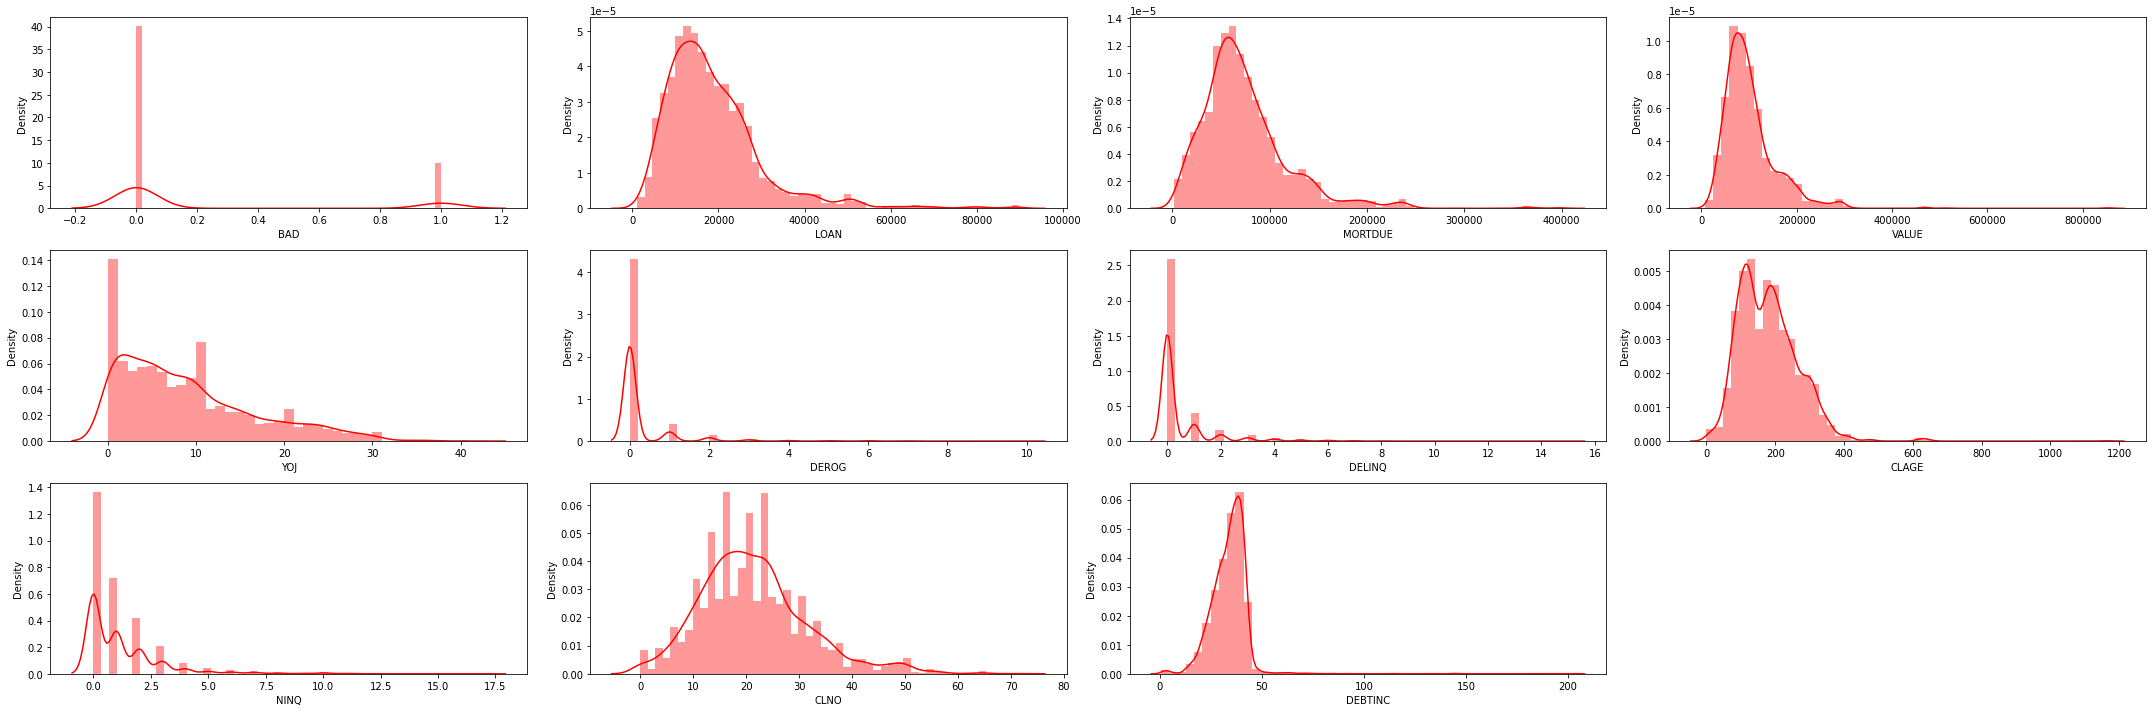

In [ ]:
col = numerik.columns

plt.figure(figsize=(30,10))
for i in range(0,len(col)):
  plt.subplot(3,4,i+1)
  sns.distplot(numerik[numerik.columns[i]],color='red')
  plt.tight_layout()

In [ ]:
numerik.columns[numerik.isna().any()].to_list()

['MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

`mengisi missing value menggunakan MICE imputation`

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer

col = numerik.columns[numerik.isna().any()].to_list()

imputer = IterativeImputer()
numerik[col] = imputer.fit_transform(numerik[col])
numerik.isna().sum()

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


BAD        0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

`check distplot setelah missing value diatasi`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

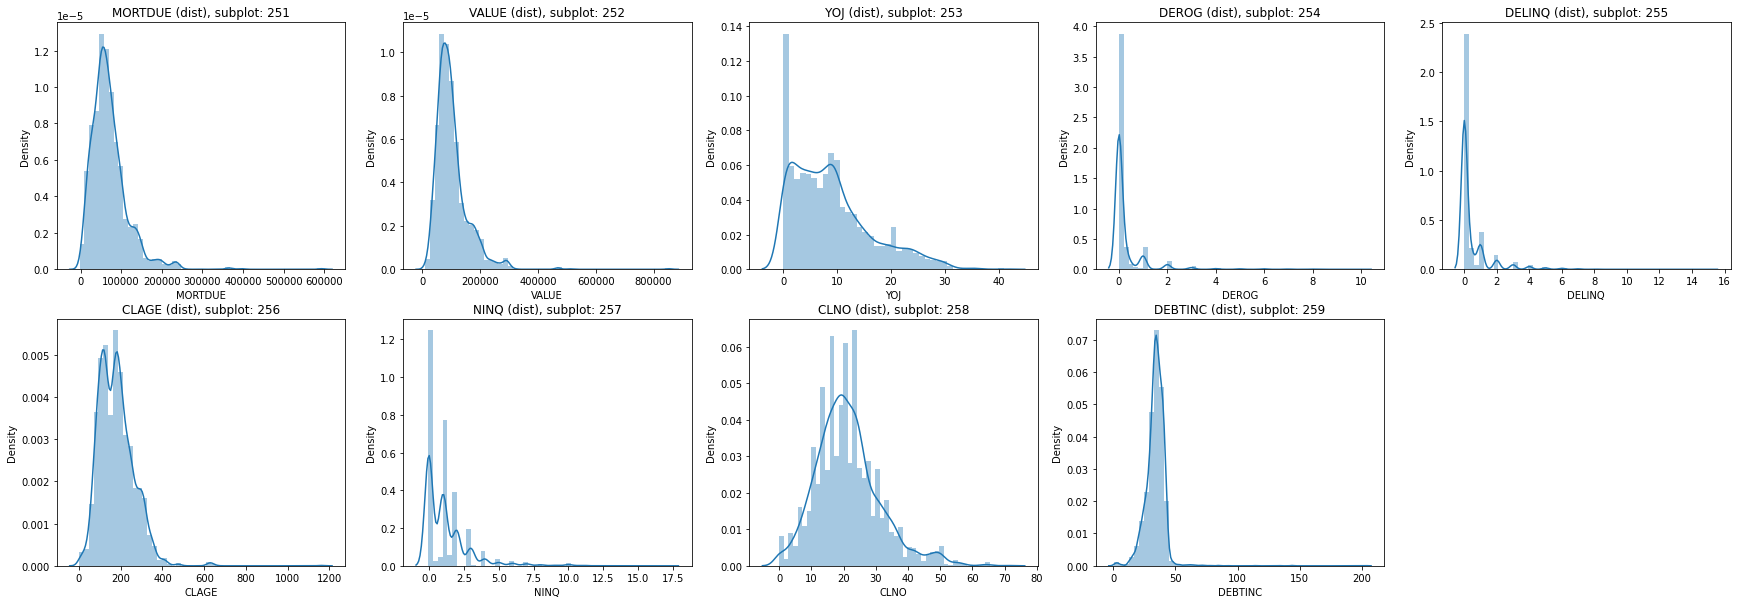

In [ ]:
checknum = col

a = 2
b = 5
c = 1

fig = plt.figure(figsize=(30,10))
for i in checknum:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(numerik[i])
    c = c + 1

plt.show()

***terlihat banyak data mendekati dist normal tetapi memiliki banyak outlier***

`menghapus outlier dengan zscore`

In [ ]:
from scipy import stats
numerik = numerik[(np.abs(stats.zscore(numerik)) < 3).all(axis=1)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

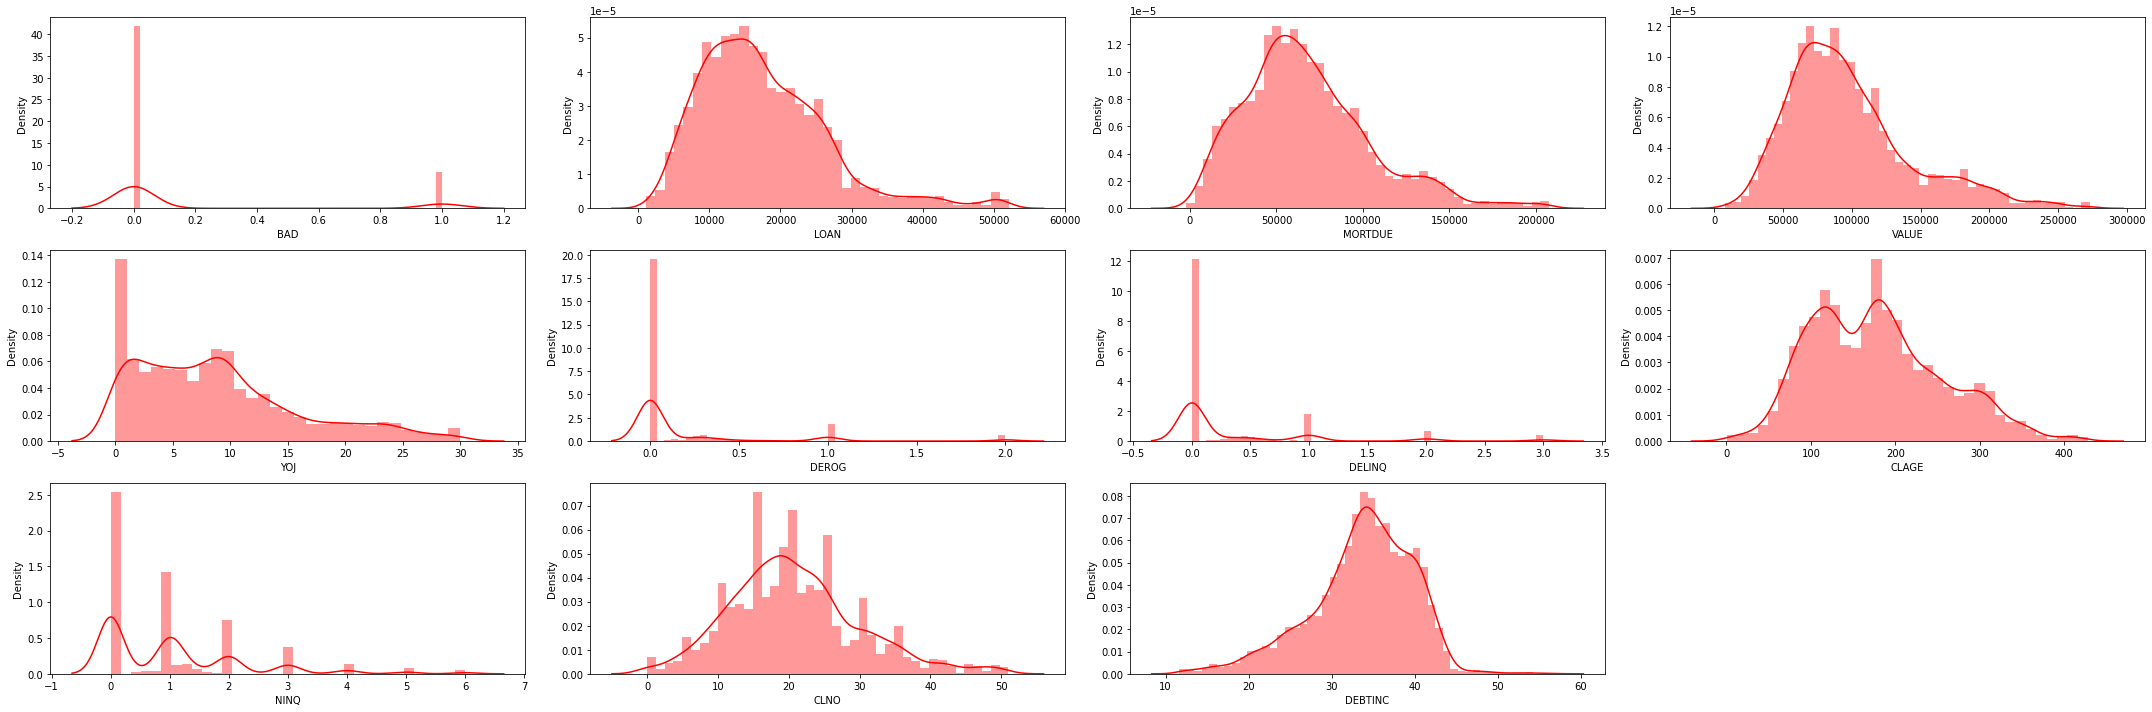

In [ ]:
col = numerik.columns

plt.figure(figsize=(30,10))
for i in range(0,len(col)):
  plt.subplot(3,4,i+1)
  sns.distplot(numerik[numerik.columns[i]],color='red')
  plt.tight_layout()

In [ ]:
kategorik.columns

Index(['REASON', 'JOB', 'Status'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '')

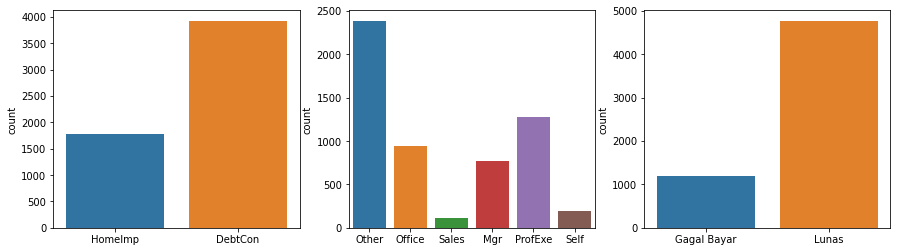

In [ ]:
plt.figure(figsize=(15,4))

ax = plt.subplot(131)
sns.countplot(kategorik['REASON'],ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

ax = plt.subplot(132)
sns.countplot(kategorik['JOB'],ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

ax = plt.subplot(133)
sns.countplot(kategorik['Status'],ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

***terdapat embalance data pada variabel target***

`mengisi missing value var kategori menggunakan modus`

In [ ]:
modetreat = kategorik.columns[kategorik.isna().any()].to_list()

for i in modetreat:
  kategorik.loc[kategorik.loc[:,i].isna(),i] = kategorik.loc[:,i].mode()[0]

kategorik.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


REASON    0
JOB       0
Status    0
dtype: int64

# EDA

`plot anova`

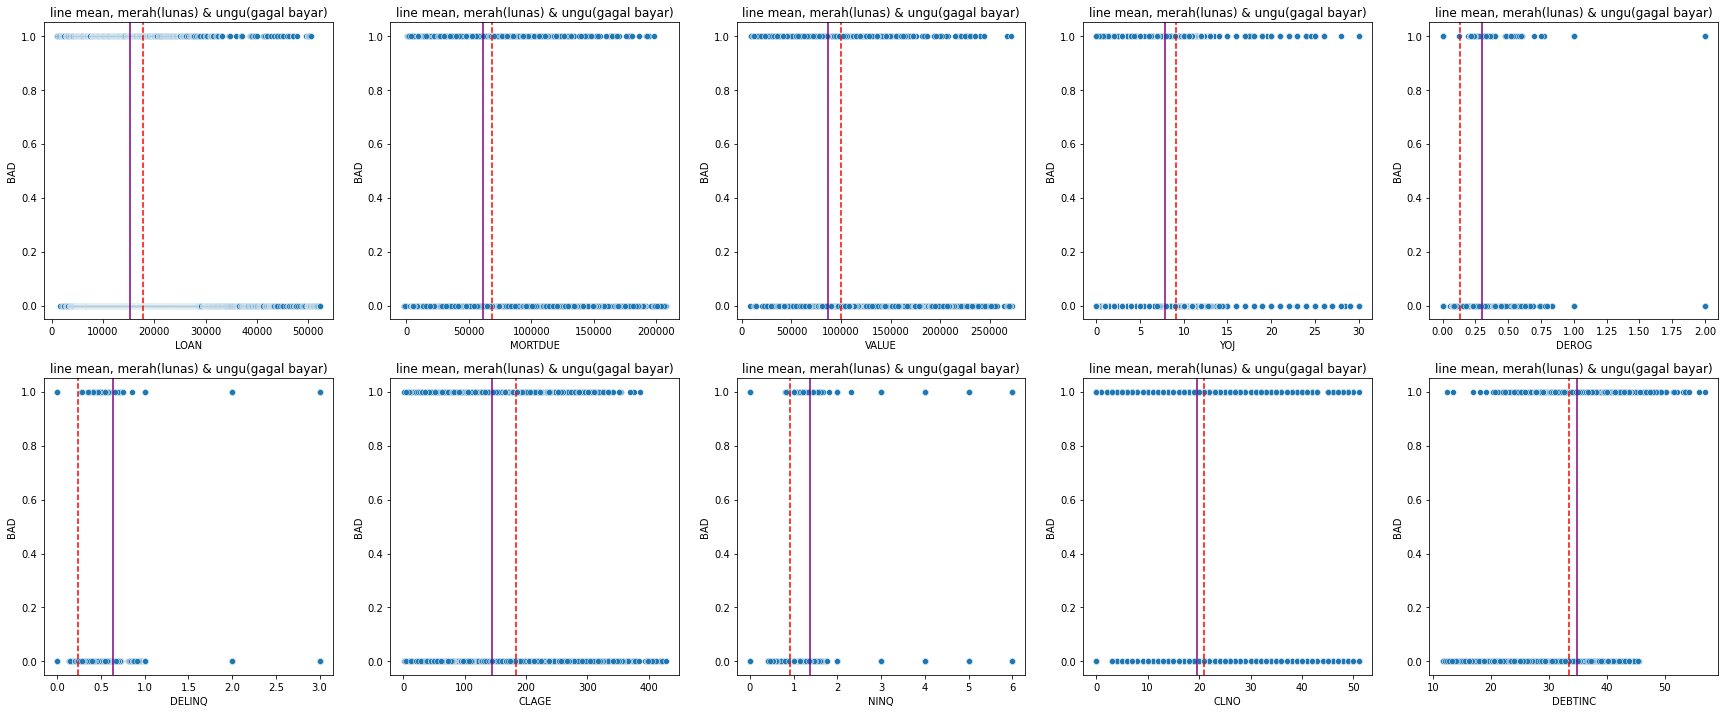

In [ ]:
col = numerik.columns[1:11]

a = 2
b = 5
c = 1

fig = plt.figure(figsize=(30,12))
for i in col:
    plt.subplot(a, b, c)
    plt.title('line mean, merah(lunas) & ungu(gagal bayar)')
    plt.xlabel(i)
    x = numerik[numerik.BAD==0]
    y = numerik[numerik.BAD==1]
    sns.scatterplot(data=numerik,y='BAD',x=i,palette="deep")
    plt.axvline(x=x[i].mean(),color='red',ls='--')
    plt.axvline(x=y[i].mean(),color='purple')
    c = c + 1

plt.show()

* LOAN : rata-rata jumlah permintaan pinjaman lunas > gagal bayar
* MORTDUE : tidak ada perbedaan rata-rata jumlah hipotek yang harus dibayar pada pinjaman lunas dan gagal bayar
* VALUE : tidak ada perbedaan rata-rata nilai properti pinjaman lunas dan gagal bayar
* YOJ : rata-rata tahun bekerja pinjman lunas > gagal bayar
* DEROG : rata-rata jumlah laporan penghinaan utama pinjaman gagal bayar > lunas
* DELINQ : rata-rata jumlah kredit macet pinjaman gagal bayar > lunas
* CLAGE : Usia jalur perdagangan tertua dalam beberapa bulan 
* NINQ : Jumlah kredit terbaru yang ditanyakan
* CLNO : Jumlah perdagangan
* DEBTINC : Rasio utang terhadap pendapatan

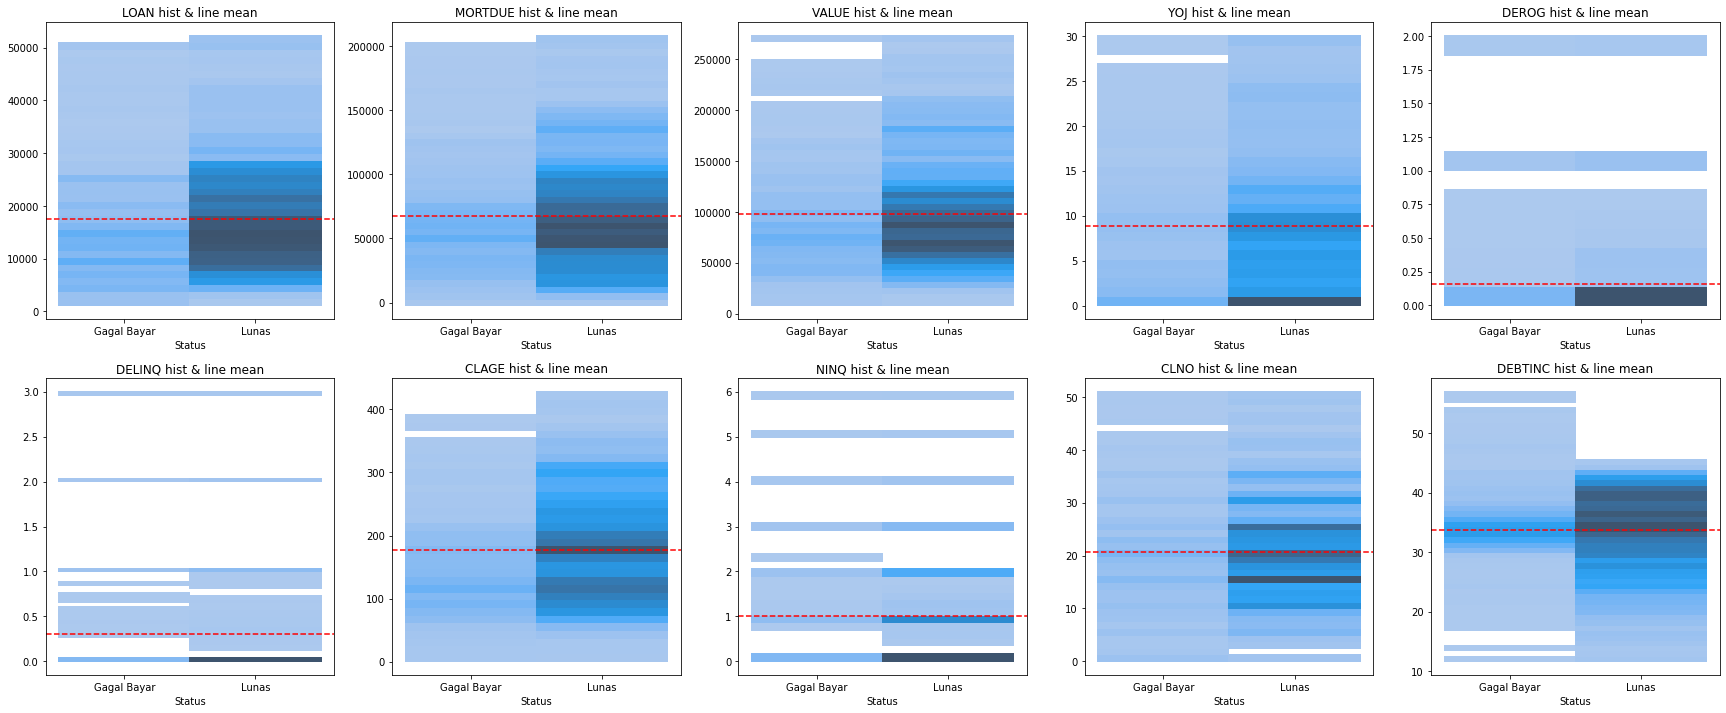

In [ ]:
df = numerik.copy()
df.drop(['BAD'],axis=1,inplace=True)

col = df.columns

df = df.join(kategorik['Status'])

a = 2
b = 5
c = 1

fig = plt.figure(figsize=(30,12))
for i in col:
    plt.subplot(a, b, c)
    plt.title('{} hist & line mean'.format(i))
    sns.histplot(data=df, x='Status', y=i)
    plt.axhline(y=df[i].mean(),color='red',ls='--')
    plt.ylabel('')
    c = c + 1

plt.show()

In [ ]:
datamean = pd.DataFrame(kategorik['Status'])

datamean['Loan'] = numerik['LOAN'].apply(lambda x:'diatas mean' if x > numerik['LOAN'].mean() else 'dibawah mean')
datamean['Mortdue'] = numerik['MORTDUE'].apply(lambda x:'diatas mean' if x > numerik['MORTDUE'].mean() else 'dibawah mean')
datamean['Value'] = numerik['VALUE'].apply(lambda x:'diatas mean' if x > numerik['VALUE'].mean() else 'dibawah mean')
datamean['Yoj'] = numerik['YOJ'].apply(lambda x:'diatas mean' if x > numerik['YOJ'].mean() else 'dibawah mean')
datamean['Derog'] = numerik['DEROG'].apply(lambda x:'diatas mean' if x > numerik['DEROG'].mean() else 'dibawah mean')
datamean['Delinq'] = numerik['DELINQ'].apply(lambda x:'diatas mean' if x > numerik['DELINQ'].mean() else 'dibawah mean')
datamean['Clage'] = numerik['CLAGE'].apply(lambda x:'diatas mean' if x > numerik['CLAGE'].mean() else 'dibawah mean')
datamean['Ninq'] = numerik['NINQ'].apply(lambda x:'diatas mean' if x > numerik['NINQ'].mean() else 'dibawah mean')
datamean['Clno'] = numerik['CLNO'].apply(lambda x:'diatas mean' if x > numerik['CLNO'].mean() else 'dibawah mean')
datamean['Debtinc'] = numerik['DEBTINC'].apply(lambda x:'diatas mean' if x > numerik['DEBTINC'].mean() else 'dibawah mean')

In [ ]:
a = datamean.groupby('Loan')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
a['var'] = 'LOAN';a.rename(columns={'Loan':'keterangan'},inplace=True)

b = datamean.groupby('Mortdue')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
b['var'] = 'MORTDUE';b.rename(columns={'Mortdue':'keterangan'},inplace=True)

c = datamean.groupby('Value')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
c['var'] = 'VALUE';c.rename(columns={'Value':'keterangan'},inplace=True)

d = datamean.groupby('Yoj')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
d['var'] = 'YOJ';d.rename(columns={'Yoj':'keterangan'},inplace=True)

e = datamean.groupby('Derog')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
e['var'] = 'DEROG';e.rename(columns={'Derog':'keterangan'},inplace=True)

f = datamean.groupby('Delinq')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
f['var'] = 'DELINQ';f.rename(columns={'Delinq':'keterangan'},inplace=True)

g = datamean.groupby('Clage')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
g['var'] = 'CLAGE';g.rename(columns={'Clage':'keterangan'},inplace=True)

h = datamean.groupby('Ninq')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
h['var'] = 'NINQ';h.rename(columns={'Ninq':'keterangan'},inplace=True)

i = datamean.groupby('Clno')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
i['var'] = 'CLNO';i.rename(columns={'Clno':'keterangan'},inplace=True)

j = datamean.groupby('Debtinc')['Status'].value_counts(normalize=True).mul(100).rename('%').reset_index()
j['var'] = 'DEBTINC';j.rename(columns={'Debtinc':'keterangan'},inplace=True)

listdata = [a,b,c,d,e,f,g,h,i,j]
datamean = pd.concat(listdata)
datamean.head()

,keterangan,Status,%,var
0,diatas mean,Lunas,88.122776,LOAN
1,diatas mean,Gagal Bayar,11.877224,LOAN
2,dibawah mean,Lunas,80.112882,LOAN
3,dibawah mean,Gagal Bayar,19.887118,LOAN
0,diatas mean,Lunas,86.498258,MORTDUE


In [ ]:
numerik.drop('BAD',axis=1).describe().loc[['mean']]

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
mean,17421.787072,67533.912065,97587.4931,8.861684,0.158884,0.300902,177.029679,1.002784,20.778438,33.664536


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


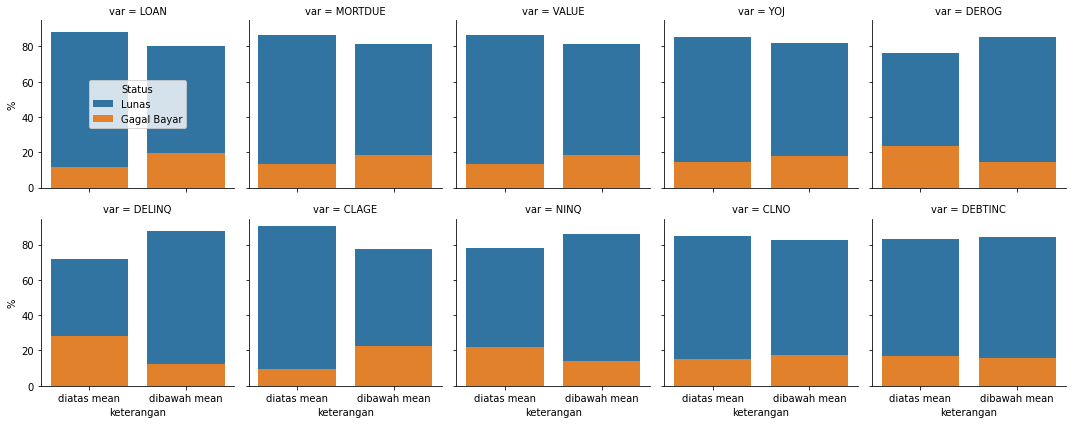

In [ ]:
gridplot = sns.FacetGrid(data=datamean, col='var', hue='Status', col_wrap=5,legend_out=False)
gridplot.map(sns.barplot, 'keterangan', '%')
gridplot.add_legend(loc='center')

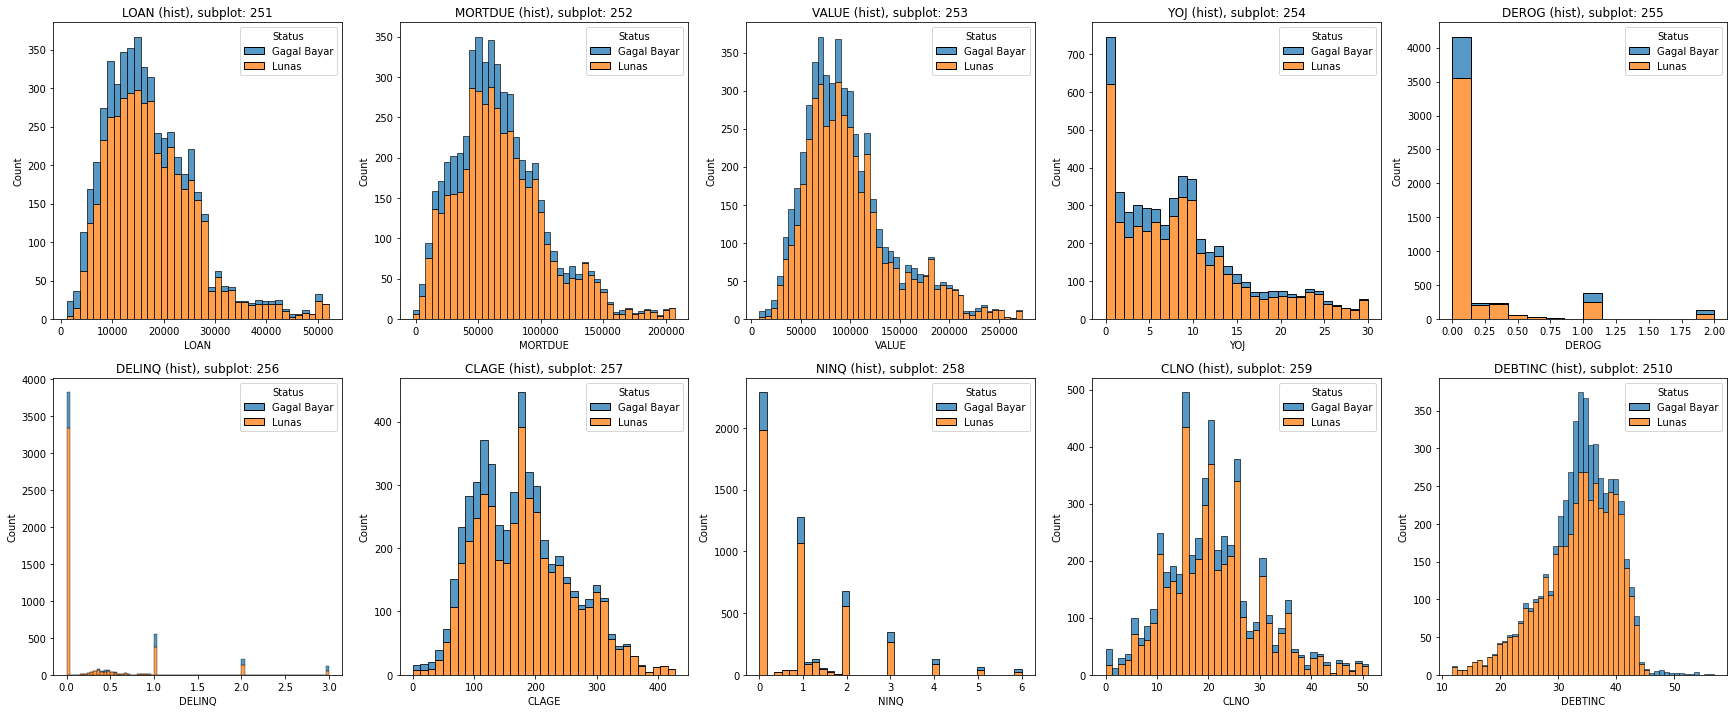

In [ ]:
df = numerik.copy()
df.drop(['BAD'],axis=1,inplace=True)

col = df.columns

df = df.join(kategorik['Status'])

a = 2
b = 5
c = 1

fig = plt.figure(figsize=(30,12))
for i in col:
    plt.subplot(a, b, c)
    plt.title('{} (hist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.histplot(data=df, x=i, hue="Status", multiple="stack")
    c = c + 1

plt.show()

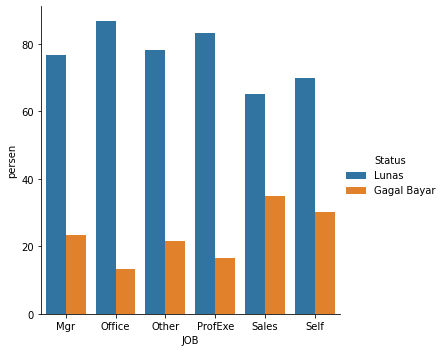

In [ ]:
df = kategorik.groupby('JOB')['Status'].value_counts(normalize=True).mul(100).rename('persen').reset_index()
sns.catplot(data=df,x='JOB',y='persen',hue='Status',kind='bar')

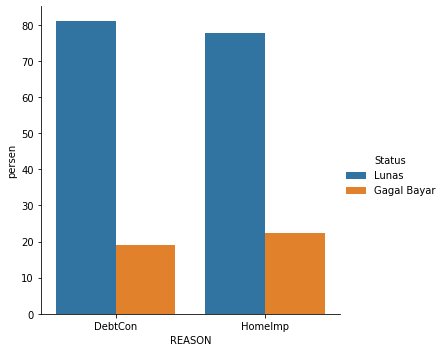

In [ ]:
df = kategorik.groupby('REASON')['Status'].value_counts(normalize=True).mul(100).rename('persen').reset_index()
sns.catplot(data=df,x='REASON',y='persen',hue='Status',kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


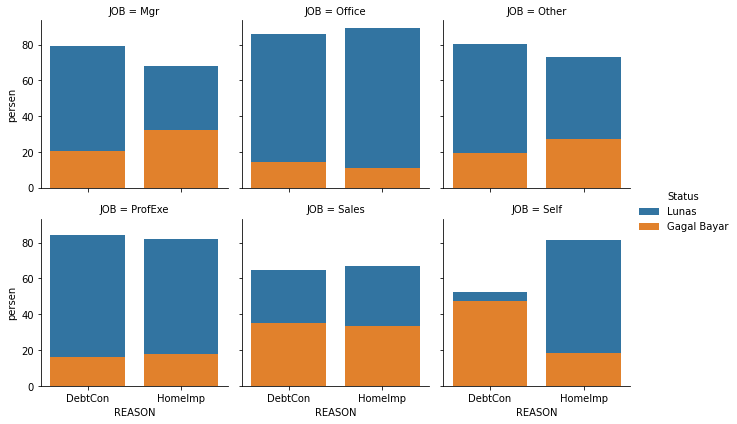

In [ ]:
df = kategorik.groupby(['JOB','REASON'])['Status'].value_counts(normalize=True).mul(100).rename('persen').reset_index()

gridplot = sns.FacetGrid(data=df, col='JOB', hue='Status', col_wrap=3)
gridplot.map(sns.barplot, 'REASON', 'persen')
gridplot.add_legend(loc='center right')

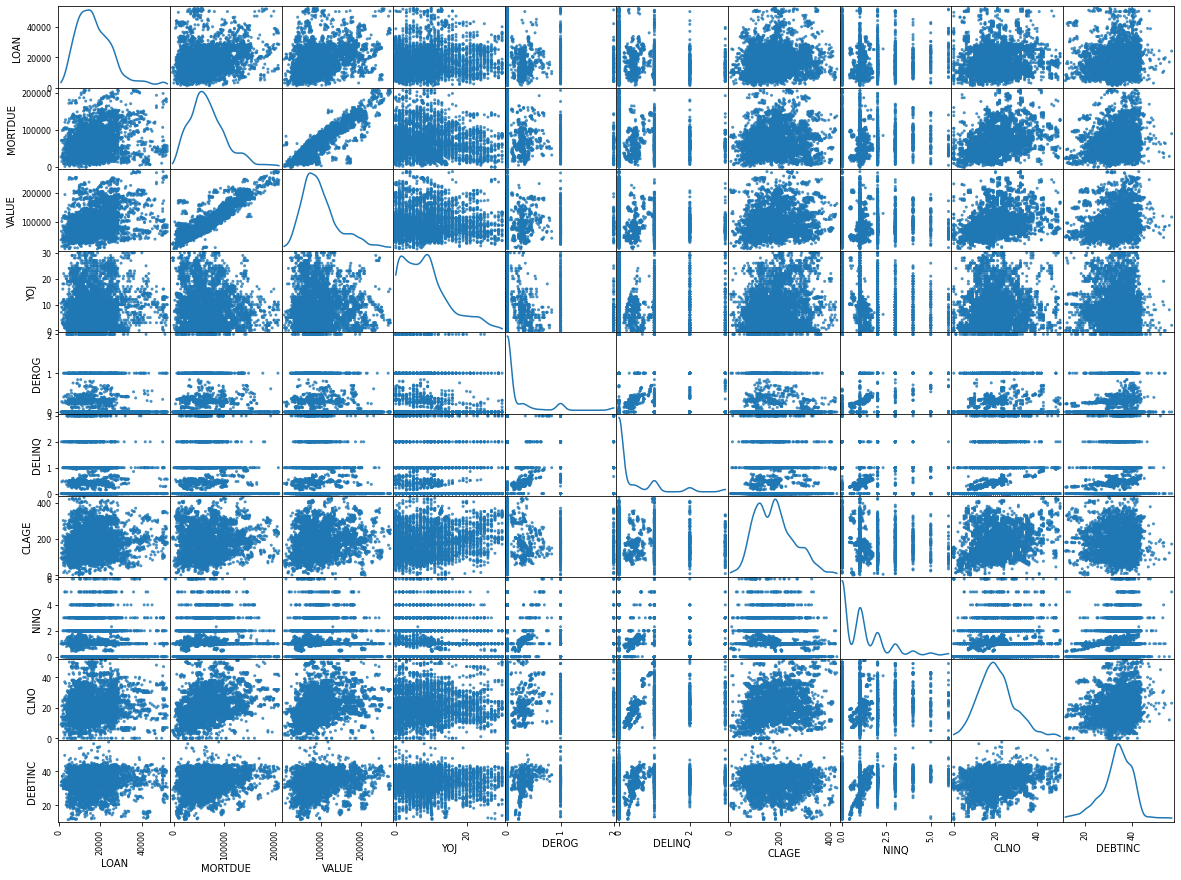

In [ ]:
df = numerik.copy()
df.drop(['BAD'],axis=1,inplace=True)
pd.plotting.scatter_matrix(df, alpha=0.8, diagonal='kde', figsize=(20, 15));

In [ ]:
korelasi = numerik.drop('BAD',axis=1).corr().style.background_gradient(sns.light_palette('red', as_cmap=True))
korelasi

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
LOAN,1.000000,0.187917,0.319838,0.084268,0.001188,-0.094176,0.100946,0.038114,0.116650,0.085524
MORTDUE,0.187917,1.000000,0.900726,-0.098427,-0.021823,-0.042026,0.094380,0.021006,0.356527,0.244860
VALUE,0.319838,0.900726,1.000000,-0.024996,-0.044965,-0.061883,0.169635,-0.009593,0.316491,0.175366
YOJ,0.084268,-0.098427,-0.024996,1.000000,-0.066775,0.021711,0.212325,-0.068676,0.025863,-0.071276
DEROG,0.001188,-0.021823,-0.044965,-0.066775,1.000000,0.224586,-0.063755,0.168246,0.034022,0.031958
DELINQ,-0.094176,-0.042026,-0.061883,0.021711,0.224586,1.000000,-0.010057,0.050070,0.111859,0.056223
CLAGE,0.100946,0.094380,0.169635,0.212325,-0.063755,-0.010057,1.000000,-0.104366,0.245607,-0.009175
NINQ,0.038114,0.021006,-0.009593,-0.068676,0.168246,0.050070,-0.104366,1.000000,0.147580,0.218774
CLNO,0.116650,0.356527,0.316491,0.025863,0.034022,0.111859,0.245607,0.147580,1.000000,0.228766
DEBTINC,0.085524,0.244860,0.175366,-0.071276,0.031958,0.056223,-0.009175,0.218774,0.228766,1.000000


In [ ]:
x = numerik['VALUE']-numerik['MORTDUE']
print('jumlah peminjaman nilai properti > nilai KPR',x[x>0].shape)
print('jumlah peminjaman nilai properti < nilai KPR',x[x<0].shape)

jumlah peminjaman nilai properti > nilai KPR (5231,)
jumlah peminjaman nilai properti < nilai KPR (29,)


*variabel kategori tidak balance maka tidak dimasukkan dalam data*

`menggabungkan data numerik dan kategorik`

In [ ]:
dataset = numerik.join(kategorik)
dataset.shape

(5260, 14)

`select feature with ANOVA,ChiSquare`

In [ ]:
dataset.drop('Status',axis=1,inplace=True)

dataset_x = dataset.select_dtypes(exclude='object')
dataset_y = dataset.select_dtypes(include='object')

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif,chi2
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#ANOVA
Xnum = dataset_x.drop(['BAD'],axis=1)
ycat = dataset_x['BAD']

anova = SelectKBest(score_func=f_classif,k='all').fit(Xnum,ycat)
col = Xnum.columns

pvalue = []
for i in anova.pvalues_:
  pvalue.append("{:.10f}".format(i))

pd.Series(pvalue,col)

LOAN       0.0000000000
MORTDUE    0.0000000374
VALUE      0.0000000000
YOJ        0.0000019213
DEROG      0.0000000000
DELINQ     0.0000000000
CLAGE      0.0000000000
NINQ       0.0000000000
CLNO       0.0000160691
DEBTINC    0.0000000004
dtype: object

In [ ]:
#Chi Square
from sklearn.preprocessing import LabelEncoder

kategorik2 = dataset_y.copy()
col = kategorik2.columns
kategorik2[col] = kategorik2[col].apply(LabelEncoder().fit_transform)

Xcat = kategorik2
ycat = dataset_x['BAD']

score, pval = chi2(Xcat,ycat)
pval = pd.Series(pval)
pval.index = Xcat.columns
print(pval)

REASON    0.003611
JOB       0.471897
dtype: float64


#Data Preprocessing

`dataset dengan select feature `

In [ ]:
dataset_sf = dataset.drop(['CLNO','MORTDUE','JOB'],axis=1)

dataset_sf_x = dataset_sf.select_dtypes(exclude='object')
dataset_sf_y = pd.get_dummies(dataset_sf['REASON'])
dataset_sf = pd.concat([dataset_sf_x,dataset_sf_y],axis=1)

X_sf = dataset_sf.drop('BAD',axis=1)
y_sf = dataset_sf['BAD']

`dataset tanpa select feature`

In [ ]:
from sklearn.preprocessing import OneHotEncoder

dataset_y = pd.get_dummies(dataset_y)

dataset = pd.concat([dataset_x,dataset_y],axis=1)

X = dataset.drop('BAD',axis=1)
y = dataset['BAD']

`check embalance var target`

In [ ]:
dataset['BAD'].value_counts()

0    4394
1     866
Name: BAD, dtype: int64

*perlu dilakukan embalance data untuk data target*

`partisi data latih dan test untuk model`

In [ ]:
from sklearn.model_selection import train_test_split

#std
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

#selectfitur
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_sf,y_sf,test_size=0.3,random_state=321)

`teknik oversampling dalam menyeimbangkan variabel target`

In [ ]:
from pandas.core.common import random_state
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto',random_state=123)
X_train,y_train = smote.fit_resample(X_train,y_train)

smote2 = SMOTE(sampling_strategy='auto',random_state=321)
X_train2,y_train2 = smote2.fit_resample(X_train2,y_train2)

`Standardization`-
Standart Scaller untuk yang distribusinya skew

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

col = X.select_dtypes(exclude='uint8').columns
col2 = X_sf.select_dtypes(exclude='uint8').columns

#standarisasi
stdSc = StandardScaler()
X_train.loc[:, col] = stdSc.fit_transform(X_train.loc[:, col])
X_test.loc[:, col] = stdSc.transform(X_test.loc[:, col])

#standarisasi selectfitur
std = StandardScaler()
X_train2.loc[:, col2] = std.fit_transform(X_train2.loc[:, col2])
X_test2.loc[:, col2] = std.transform(X_test2.loc[:, col2])

# Model ML

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': BernoulliNB(),
    'Support Vector Machine': SVC(gamma='auto', kernel='linear', probability=True)
}

model_col = list(models)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
akurasi=[]
presisi=[]
sensitivitas=[]

for name, model in models.items():
    n_scores = cross_val_score(model, X_train, y_train, 
                                cv=5, scoring= "accuracy")
    n_scores2 = cross_val_score(model, X_train, y_train, 
                                cv=5, scoring= "precision")
    n_scores3 = cross_val_score(model, X_train, y_train, 
                                cv=5, scoring= "recall")
    
    akurasi.append(np.mean(n_scores))
    presisi.append(np.mean(n_scores2))
    sensitivitas.append(np.mean(n_scores3))

    #model performance
    print('{} - Average Akurasi, Presisi, Sensitivitas Score: {:.5f}, {:.5f}, {:.5f}' .format(name, np.mean(n_scores), np.mean(n_scores2), np.mean(n_scores3)))

Logistic Regression - Average Akurasi, Presisi, Sensitivitas Score: 0.81563, 0.88661, 0.72370
k-Nearest Neighbors - Average Akurasi, Presisi, Sensitivitas Score: 0.95524, 0.94876, 0.96252
Decision Tree - Average Akurasi, Presisi, Sensitivitas Score: 0.89691, 0.91835, 0.87591
Naive Bayes - Average Akurasi, Presisi, Sensitivitas Score: 0.75745, 0.76529, 0.73790
Support Vector Machine - Average Akurasi, Presisi, Sensitivitas Score: 0.80222, 0.94640, 0.65067


`modeling with select feature`

In [ ]:
models_sf = {
    'Logistic Regression': LogisticRegression(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': BernoulliNB(),
    'Support Vector Machine': SVC(gamma='auto', kernel='linear', probability=True)
}

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

for name, model in models_sf.items():
    n_scores = cross_val_score(model, X_train2, y_train2, 
                                cv=5, scoring= "accuracy")
    n_scores2 = cross_val_score(model, X_train2, y_train2, 
                                cv=5, scoring= "precision")
    n_scores3 = cross_val_score(model, X_train2, y_train2, 
                                cv=5, scoring= "recall")
    
    #model performance
    print('{} - Average Akurasi, Presisi, Sensitivitas Score: {:.5f}, {:.5f}, {:.5f}' .format(name, np.mean(n_scores), np.mean(n_scores2), np.mean(n_scores3)))

Logistic Regression - Average Akurasi, Presisi, Sensitivitas Score: 0.75171, 0.79306, 0.68084
k-Nearest Neighbors - Average Akurasi, Presisi, Sensitivitas Score: 0.91826, 0.91878, 0.91809
Decision Tree - Average Akurasi, Presisi, Sensitivitas Score: 0.86822, 0.88640, 0.84687
Naive Bayes - Average Akurasi, Presisi, Sensitivitas Score: 0.72035, 0.73022, 0.69709
Support Vector Machine - Average Akurasi, Presisi, Sensitivitas Score: 0.74602, 0.80020, 0.65549


*select feature anova,chi2 memberikan akurasi lebih rendah dibandingkan non select feature*

# Ensemble Modeling

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

In [ ]:
models_ensemble = {
    'ada boosting': AdaBoostClassifier(),
    'bagging': BaggingClassifier(),
    'extra tree': ExtraTreesClassifier(),
    'gradient boosting': GradientBoostingClassifier(),
    'bagging randomforest': RandomForestClassifier(),
    'stochastic gradient': SGDClassifier(),
    'xgboosting': XGBClassifier()
}

model2 = list(models_ensemble)
model_col = model_col + model2

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

for name, model in models_ensemble.items():
    n_scores = cross_val_score(model, X_train, y_train, 
                                cv=5, scoring= "accuracy")
    n_scores2 = cross_val_score(model, X_train, y_train, 
                                cv=5, scoring= "precision")
    n_scores3 = cross_val_score(model, X_train, y_train, 
                                cv=5, scoring= "recall")
    
    akurasi.append(np.mean(n_scores))
    presisi.append(np.mean(n_scores2))
    sensitivitas.append(np.mean(n_scores2))

    #model performance
    print('{} - Average Akurasi, Presisi, Sensitivitas Score: {:.5f}, {:.5f}, {:.5f}' .format(name, np.mean(n_scores), np.mean(n_scores2), np.mean(n_scores3)))

ada boosting - Average Akurasi, Presisi, Sensitivitas Score: 0.85732, 0.87851, 0.82680
bagging - Average Akurasi, Presisi, Sensitivitas Score: 0.91388, 0.95595, 0.87365
extra tree - Average Akurasi, Presisi, Sensitivitas Score: 0.95670, 0.98947, 0.92181
gradient boosting - Average Akurasi, Presisi, Sensitivitas Score: 0.88092, 0.91871, 0.83327
bagging randomforest - Average Akurasi, Presisi, Sensitivitas Score: 0.94991, 0.97574, 0.92407
stochastic gradient - Average Akurasi, Presisi, Sensitivitas Score: 0.80771, 0.86644, 0.75602
xgboosting - Average Akurasi, Presisi, Sensitivitas Score: 0.87930, 0.91430, 0.83391


`menggabungkan model + evaluasi model`

In [ ]:
n = list(zip(model_col, akurasi, presisi, sensitivitas))
pd.DataFrame(n, columns = ['Model','Akurasi','Presisi','Sensitivitas']).sort_values(['Akurasi','Sensitivitas'],ascending=False)

,Model,Akurasi,Presisi,Sensitivitas
7,extra tree,0.956702,0.989467,0.989467
1,k-Nearest Neighbors,0.955239,0.948761,0.962517
9,bagging randomforest,0.949912,0.975743,0.975743
6,bagging,0.913877,0.955955,0.955955
2,Decision Tree,0.896907,0.918346,0.875911
8,gradient boosting,0.880917,0.918714,0.918714
11,xgboosting,0.879302,0.914301,0.914301
5,ada boosting,0.857320,0.878508,0.878508
0,Logistic Regression,0.815628,0.886613,0.723698
10,stochastic gradient,0.807711,0.866443,0.866443


`feature important`

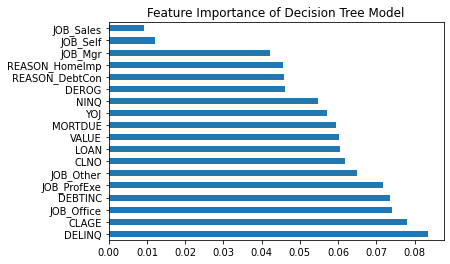

In [ ]:
extra_tree = ExtraTreesClassifier()
extra_tree.fit(X_train, y_train)
  
featimp = pd.Series(extra_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)
featimp.plot(kind='barh', title='Feature Importance of Decision Tree Model')

#Tuning Parameter

`GridSearchCV`

In [ ]:
xtree_param = {
    "max_depth": [3, None],
    "min_samples_leaf": [1, 2, 4],
    'criterion': ['entropy', 'gini'],
    'max_features': ['auto', 'log2',None]
            }

knn_param = {
    'n_neighbors' : [1,2,3,4,5,6,7,8],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
            }

rf_param = {
    'bootstrap': [True, False],
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20, 50, 100, None],
    'max_features': ['auto','log2',None],
    'n_estimators': [50, 100],
            }

In [ ]:
xtree = ExtraTreesClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

best_models = {
    'Extra Tree Classifier':[xtree,xtree_param],
    'k-Nearest Neighbors':[knn,knn_param],
    'Random Forest Classifier':[rf,rf_param]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
cv = StratifiedKFold(n_splits=5)

for name, specs in best_models.items():
    model, param = specs[0], specs[1]
    search = GridSearchCV(estimator=model, param_grid=param, cv=cv, scoring='roc_auc')
    search2 = GridSearchCV(estimator=model, param_grid=param, cv=cv, scoring='accuracy')

    search.fit(X_train, y_train)
    search2.fit(X_train,y_train)

    print('{} - ROC-AUC Score: {:.5f}' .format(name, search.best_score_))
    print('with best parameters: {}.\n' .format(search.best_params_))

    print('{} - Accuracy Score: {:.5f}' .format(name, search2.best_score_))
    print('with best parameters: {}.\n' .format(search2.best_params_))

Extra Tree Classifier - ROC-AUC Score: 0.99546
with best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1}.

Extra Tree Classifier - Accuracy Score: 0.95638
with best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1}.

k-Nearest Neighbors - ROC-AUC Score: 0.99819
with best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}.

k-Nearest Neighbors - Accuracy Score: 0.98788
with best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}.

Random Forest Classifier - ROC-AUC Score: 0.99547
with best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}.

Random Forest Classifier - Accuracy Score: 0.95476
with best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 50}.



`modeling setelah didapatkan parameter terbaik`

In [ ]:
xtree = ExtraTreesClassifier(criterion= 'entropy', max_depth= None, max_features= 'auto', min_samples_leaf= 1,verbose=0)
xtree.fit(X_train,y_train)

ExtraTreesClassifier(criterion='entropy')

`check overfitting`

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = xtree.predict(X_train)
y_pred_test = xtree.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test set accuracy: ', accuracy_score(y_test, y_pred_test))

Training set accuracy:  1.0
Test set accuracy:  0.9321926489226869


#Evaluasi Model

`evaluasi model dengan confusion matriks`


True Positives(TP) =  1292
True Negatives(TN) =  179
False Positives(FP) =  8
False Negatives(FN) =  99




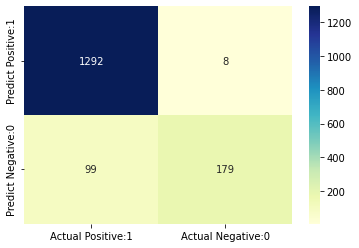

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])
print('\n')

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1300
           1       0.96      0.64      0.77       278

    accuracy                           0.93      1578
   macro avg       0.94      0.82      0.87      1578
weighted avg       0.93      0.93      0.93      1578



In [ ]:
TP = cm[0,0] #true positif
TN = cm[1,1] #true negatif
FP = cm[0,1] #false positif
FN = cm[1,0] #false negatif

In [ ]:
accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Akurasi Klasifikasi : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('\nKesalahan Klasifikasi : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('\nPresisi : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('\nSensitivitas : {0:0.4f}'.format(recall))

Akurasi Klasifikasi : 0.9322

Kesalahan Klasifikasi : 0.0678

Presisi : 0.9938

Sensitivitas : 0.9288


***terlihat model lebih memilih FN daripada FP***

1. TRUE POSITIVE RATE (TPR)

In [ ]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9288


2. FALSE POSITIVE RATE (FPR)

In [ ]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0428


3. Spacificity

In [ ]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9572


## Threshold

In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,7):
    
    y_pred1 = xtree.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1,  threshold=i/10)
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n',
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n', 
            cm1[0,1],'Type I errors( False Positives), ','\n',
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[1070  230]
 [   2  276]] 
 with 1346 correct predictions,  
 230 Type I errors( False Positives),  
 2 Type II errors( False Negatives),  

 Accuracy score:  0.85297845373891 

 Sensitivity:  0.9928057553956835 

 Specificity:  0.823076923076923 



With 0.2 threshold the Confusion Matrix is  

 [[1224   76]
 [  20  258]] 
 with 1482 correct predictions,  
 76 Type I errors( False Positives),  
 20 Type II errors( False Negatives),  

 Accuracy score:  0.9391634980988594 

 Sensitivity:  0.9280575539568345 

 Specificity:  0.9415384615384615 



With 0.3 threshold the Confusion Matrix is  

 [[1257   43]
 [  36  242]] 
 with 1499 correct predictions,  
 43 Type I errors( False Positives),  
 36 Type II errors( False Negatives),  

 Accuracy score:  0.949936628643853 

 Sensitivity:  0.8705035971223022 

 Specificity:  0.9669230769230769 



With 0.4 threshold the Confusion Matrix is  

 [[1282   18]
 [  62  216]] 
 with 1498 correct pred

Text(0.5, 1.0, 'Precision-Recall Curve')

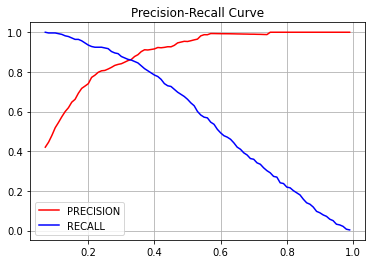

In [66]:
from sklearn.metrics import precision_recall_curve
y_prob = xtree.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_prob)

plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

## ROC AOC


`memilih threshold = 0.3 (optimal)`

In [67]:
threshold = 0.3

y_prob = xtree.predict_proba(X_test)
predicted = (y_prob[:,1] >= threshold).astype('int')

In [68]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,  predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1254   46]
 [  34  244]]

True Positives(TP) =  1254
True Negatives(TN) =  244
False Positives(FP) =  46
False Negatives(FN) =  34


In [69]:
TP = cm[0,0] #true positif
TN = cm[1,1] #true negatif
FP = cm[0,1] #false positif
FN = cm[1,0] #false negatif

In [70]:
from sklearn.metrics import roc_curve, precision_recall_curve,auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9211566131710016


`0,9-1 = Diskriminasi sangat baik.`

Text(0.5, 0, 'False Positive Rate')

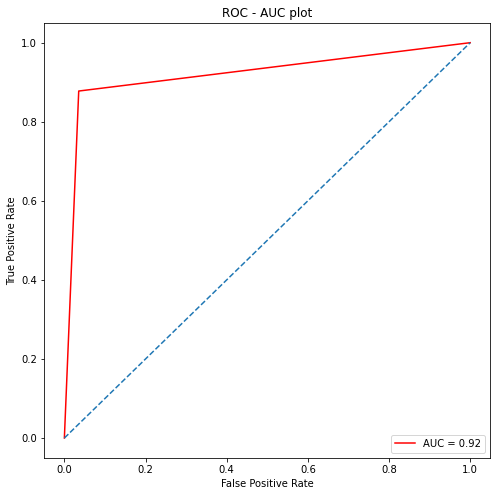

In [71]:
plt.figure(figsize=(8,8))

plt.title('ROC - AUC plot')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')